# Example and how to use the `keras-toolbox`

Source code is here : https://github.com/hadim/keras-toolbox

To install do `pip install keras-toolbox`.

## The Monitor callback

The monitor callbacks allow you to monitor a Keras model during the training phase.

Currently `keras-toolbox` has three Monitor callbacks :

- `PrintMonitor` : print the state on the output.
- `TelegramMonitor` : send the state in real-time to a chat ID on Telegram with a bot.
- `FileMonitor` : dump the entire state at each update in a JSON file.

Note that the `PrintMonitor` callback is mainly used for testing purpose. The `Monitor` you probably want to use are `TelegramMonitor` and `FileMonitor` or maybe you can make a new one.

**Note:** Before using the `TelegramMonitor` you have to create a new bot (just follows [this guide](https://core.telegram.org/bots#creating-a-new-bot)). In the process, you will be given an API token. Furthermore you need a chat ID; you can use, for instance, you user ID, that you can get using the bot [userinfobot](https://telegram.me/userinfobot).

To use see following example :

In [8]:
%matplotlib inline

from keras.backend import image_data_format
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

# Load dataset
img_rows, img_cols = 28, 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reduce the size of the dataset (for testing prupose)
X_train, y_train = X_train[:200], y_train[:200]
X_test, y_test = X_test[:200], y_test[:200]

# Preprocess dataset
if image_data_format()=='channels_first':
    img_shape = (1, img_rows, img_cols)
elif image_data_format()=='channels_last':
    img_shape = (img_rows, img_cols, 1)
else:
    raise ValueError("Problems with image_data_format")
X_train = X_train.reshape(X_train.shape[0], *img_shape).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], *img_shape).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# Build model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=img_shape, padding='valid'))
model.add(Conv2D(32, (3, 3), activation='relu',))
model.add(Conv2D(32, (3, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [9]:
# Create the monitor adn add it to the callback list

from kerastoolbox.callbacks import PrintMonitor , FileMonitor, TelegramMonitor

monitor = PrintMonitor()

# Other monitor can be used also
# monitor = FileMonitor("/path/to/the/file/to/use")
# monitor = TelegramMonitor(api_token="<your API token>", chat_id="your chat ID", plot_history=2)

callbacks = [monitor, ]

Note that with `TelegramMonitor` and the `plot_history` parameter you can send a plot of the logs every nth epochs. For example to send a plot to Telegram every 5 epochs, you can do : `monitor = TelegramMonitor(plot_history=5, ...)`.

In [11]:
history = model.fit(X_train, Y_train,
                    batch_size=32,
                    epochs=5,
                    verbose=0,
                    callbacks=callbacks,
                    validation_data=(X_test, Y_test))

Monitor initialized.
Name of the model is "A Keras model"
Model ID is 250a72f7-a5be-4d9d-aa35-65e02e57b506
Training ID is f8dba066-339f-49f8-b456-6dec62e83c27
Training started at 2018-04-21 15:50 for 5 epochs with 200 samples with a 11 layers model.
Epoch 1/5 is done at 2018-04-21 15:50. Average minutes/epoch is 0.02.
Logs are : val_loss = 0.893791 | val_acc = 0.705000 | loss = 0.540625 | acc = 0.855000
Epoch 2/5 is done at 2018-04-21 15:50. Average minutes/epoch is 0.02.
Logs are : val_loss = 0.748492 | val_acc = 0.785000 | loss = 0.300589 | acc = 0.910000
Epoch 3/5 is done at 2018-04-21 15:50. Average minutes/epoch is 0.02.
Logs are : val_loss = 0.573465 | val_acc = 0.830000 | loss = 0.257850 | acc = 0.935000
Epoch 4/5 is done at 2018-04-21 15:50. Average minutes/epoch is 0.02.
Logs are : val_loss = 0.649209 | val_acc = 0.790000 | loss = 0.190507 | acc = 0.925000
Epoch 5/5 is done at 2018-04-21 15:50. Average minutes/epoch is 0.02.
Logs are : val_loss = 0.839205 | val_acc = 0.805000 

## The visualization functions

All the functions use matplotlib for now but I am not against another library more "interactive" friendly to use in the Jupyter notebook (Bokeh for example).

Let's use the same `Model` object from above.

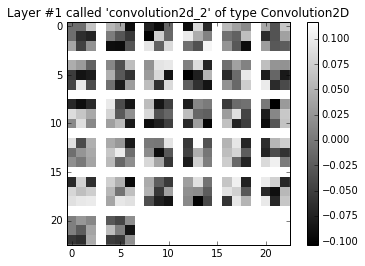

In [4]:
# Plot the weights of one specific layer in your model

from kerastoolbox.visu import plot_weights
plot_weights(model, layer_id=1, n=256, ax=None)

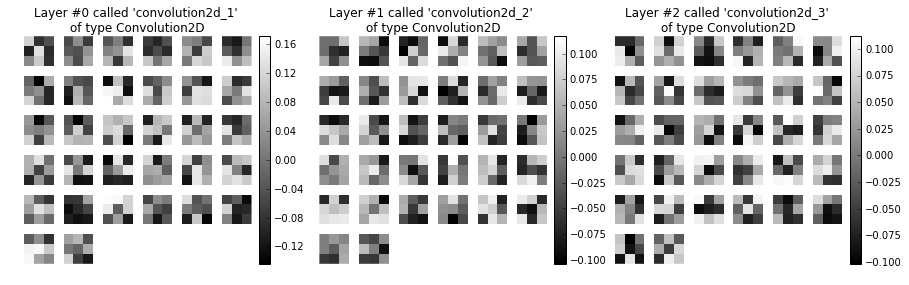

In [5]:
# Now plot all the weights of all the 2D layers

from kerastoolbox.visu import plot_all_weights
_ = plot_all_weights(model, n=256, n_columns=3)

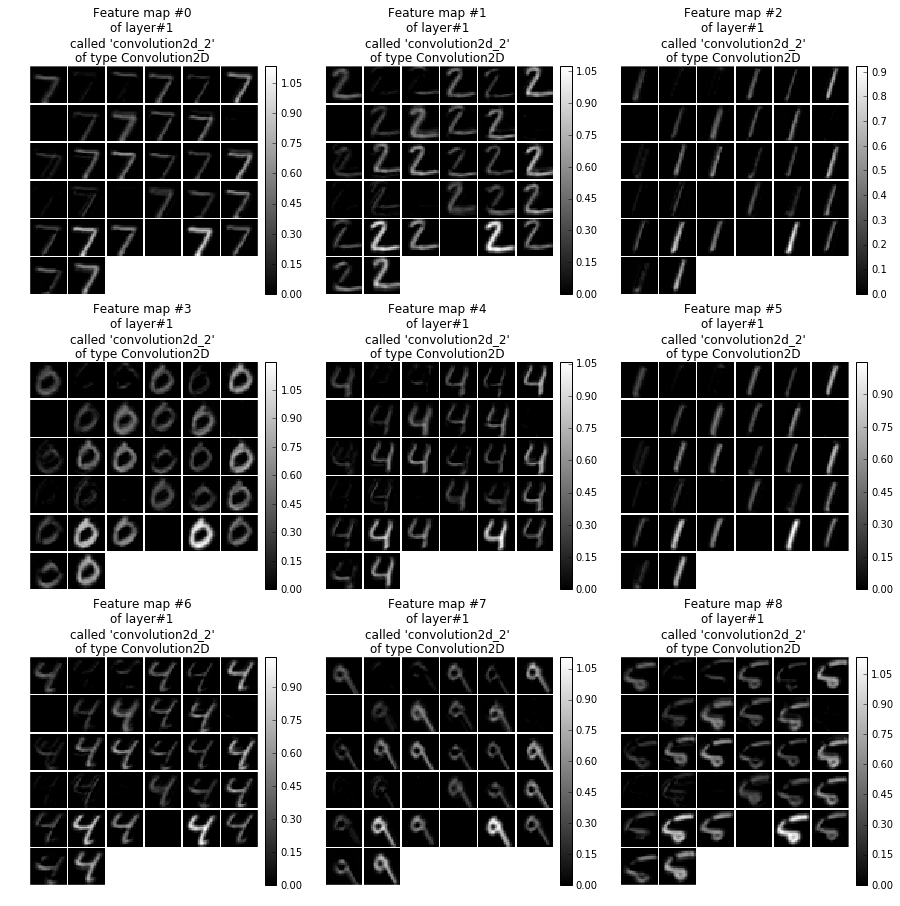

In [6]:
# Now let's plot the feature maps of a specific layer for a bunch of images

from kerastoolbox.visu import plot_feature_map

images = X_test[:9]
_ = plot_feature_map(model, X=images, layer_id=1, n_columns=3, n=256)

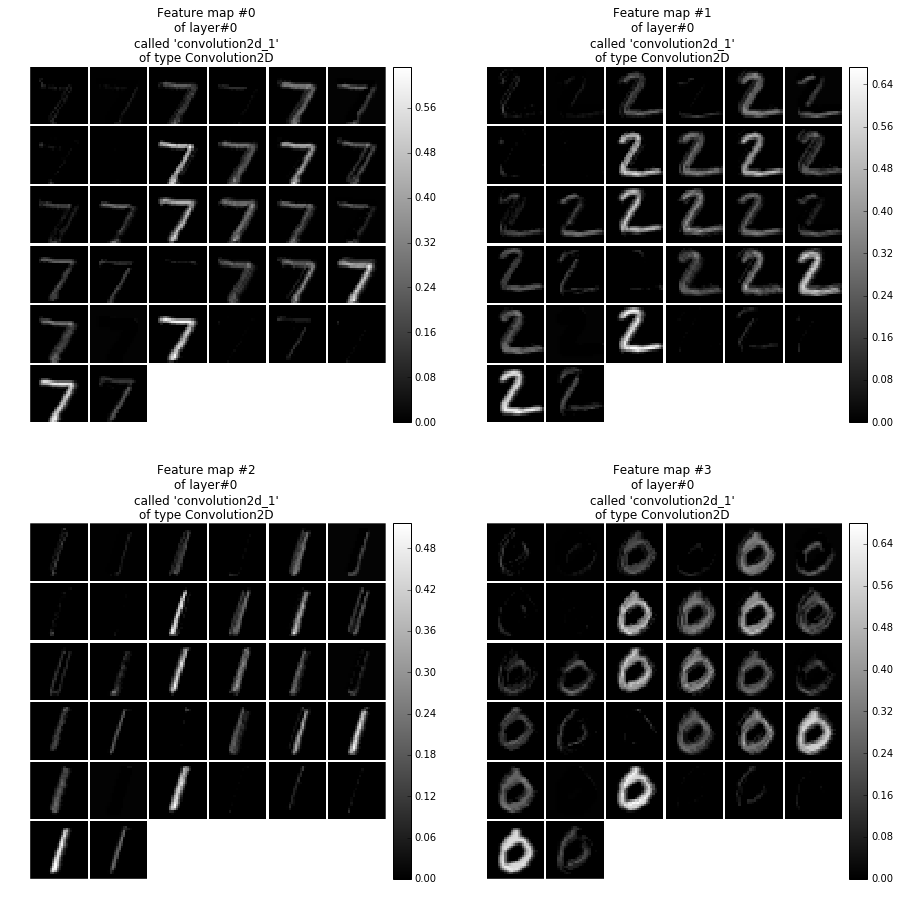

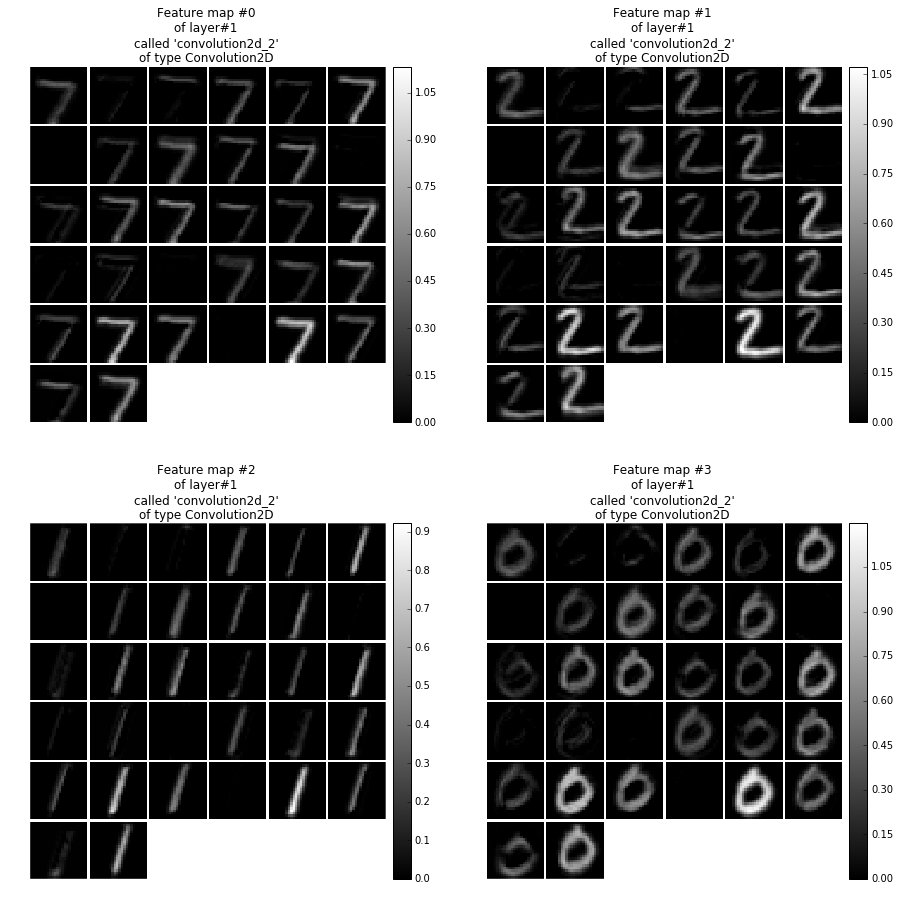

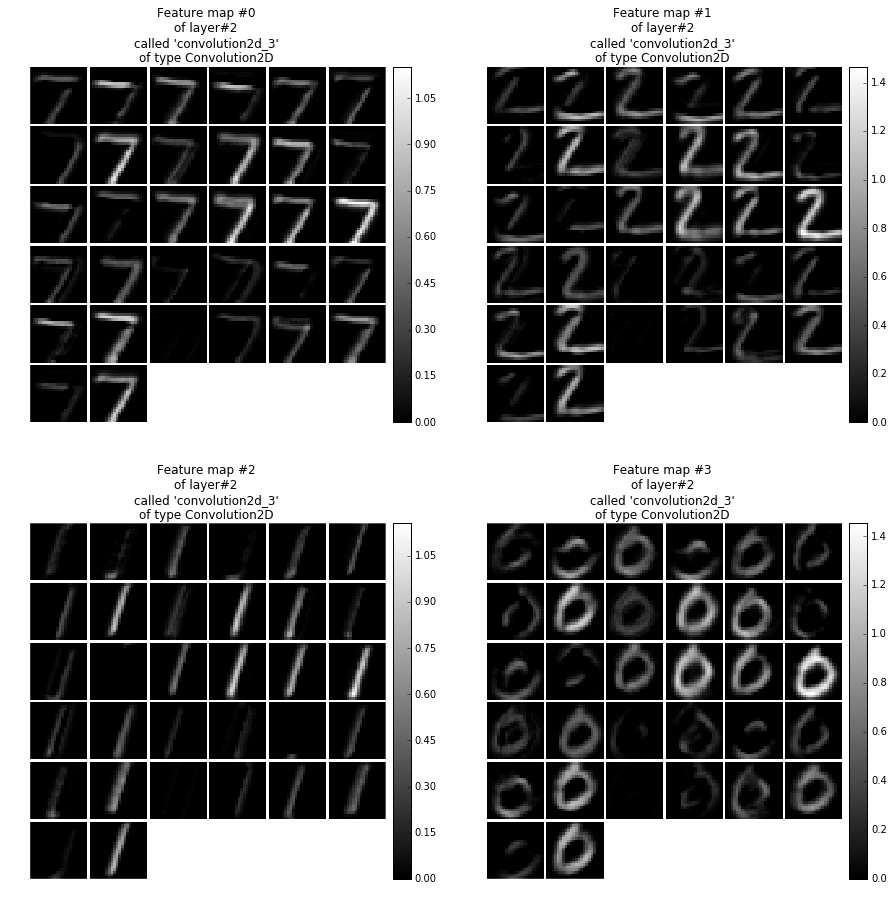

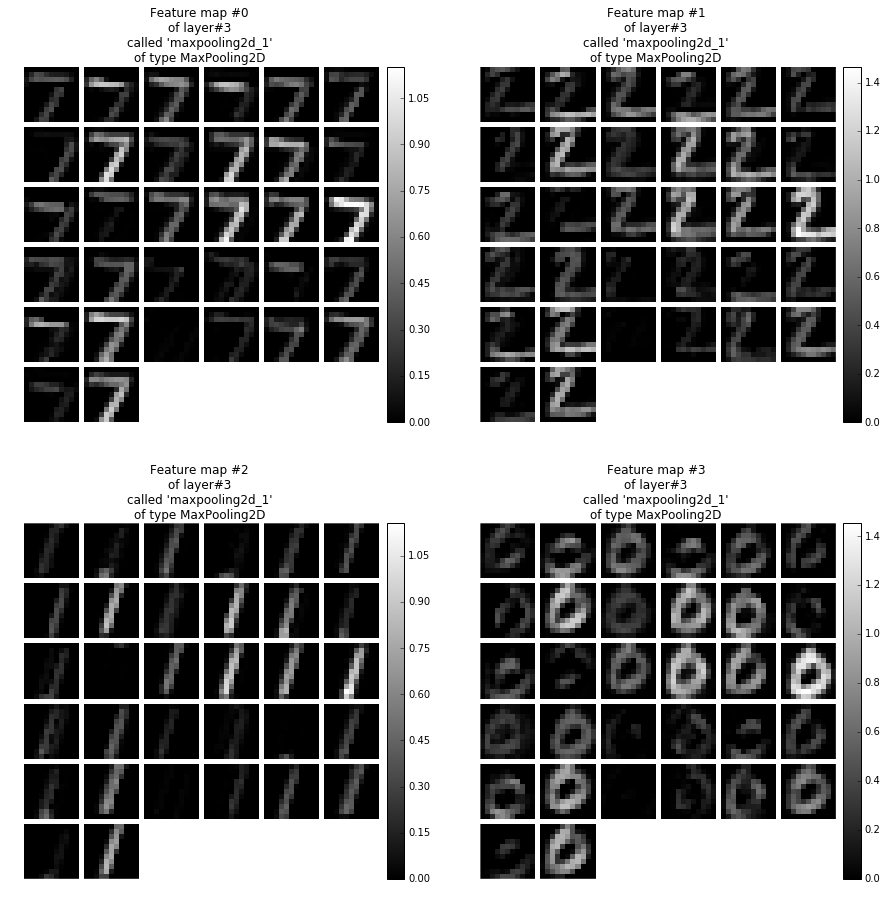

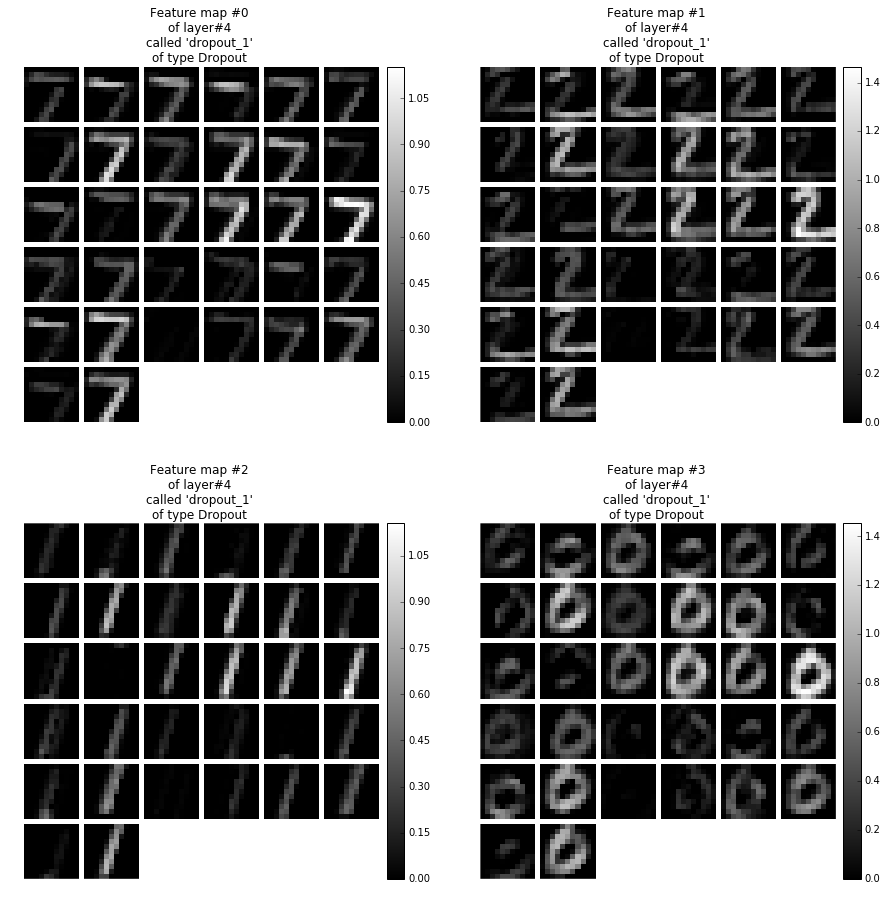

In [7]:
# Plot all feature maps for all layers for a bunch of images

from kerastoolbox.visu import plot_all_feature_maps

images = X_test[:4]
_ = plot_all_feature_maps(model, X=images, n_columns=2, n=256)

## The augmentation functions

The code is super ugly for now so no example here. See the source code https://github.com/hadim/keras-toolbox/blob/master/kerastoolbox/augmentation.py